In [188]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Certainly! Here's an explanation of the features in the backorder prediction dataset:

1. **sku**: Stock Keeping Unit, a unique identifier for a specific product or item in inventory.

2. **national_inv**: The current inventory level of the product at a national level.

3. **lead_time**: The average lead time (in days) it takes to restock the product once it's ordered.

4. **in_transit_qty**: The quantity of the product that is currently in transit, i.e., on its way to the inventory.

5. **forecast_3_month**, **forecast_6_month**, **forecast_9_month**: Forecasted demand for the product over the next 3, 6, and 9 months, respectively.

6. **sales_1_month**, **sales_3_month**, **sales_6_month**, **sales_9_month**: Actual sales quantity for the product over the past 1, 3, 6, and 9 months, respectively.

7. **min_bank**: The minimum acceptable inventory level for the product, ensuring availability during lead time.

8. **potential_issue**: A binary indicator (Yes/No) that signifies whether the product has had a potential issue in the past.

9. **pieces_past_due**: The number of pieces of the product that were past due for delivery.

10. **perf_6_month_avg**, **perf_12_month_avg**: Performance metrics indicating the average fulfillment rate of the product over the past 6 and 12 months, respectively.

11. **local_bo_qty**: The quantity of the product currently on backorder at a local level.

12. **deck_risk**: A binary indicator (Yes/No) that assesses the risk associated with keeping the product on deck.

13. **oe_constraint**: A binary indicator (Yes/No) indicating whether there's an operational engineering constraint on the product.

14. **ppap_risk**: A binary indicator (Yes/No) indicating whether the product has a Production Part Approval Process (PPAP) risk.

15. **stop_auto_buy**: A binary indicator (Yes/No) indicating whether automatic buying of the product is stopped.

16. **rev_stop**: A binary indicator (Yes/No) indicating whether revenue recognition is stopped for the product.

17. **went_on_backorder**: The target variable, a binary indicator (Yes/No) indicating whether the product went on backorder or not.

These features provide information about the product's inventory levels, demand forecasts, sales history, performance metrics, risk factors, and potential issues. They play a crucial role in building predictive models to identify the likelihood of a product going on backorder, which is valuable for optimizing inventory management and ensuring customer satisfaction.

In [84]:
train_df=pd.read_csv('/kaggle/input/backorder/Kaggle_Training_Dataset_v2.csv')
test_df=pd.read_csv('/kaggle/input/backorder/Kaggle_Test_Dataset_v2.csv')


/tmp/ipykernel_32/185334582.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_32/185334582.py:2: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [85]:
train_df.shape,test_df.shape

((1687861, 23), (242076, 23))

In [86]:
display(train_df.sample(5),test_df.sample(5))

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1242190,2823838,3.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.48,0.0,No,No,No,Yes,No,No
917962,2265946,11.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,No,0.0,0.95,0.79,0.0,Yes,No,No,Yes,No,No
1301761,2885938,61.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,5.0,2.0,No,0.0,0.96,0.87,0.0,No,No,No,Yes,No,No
1309886,2894357,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.37,0.34,0.0,No,No,No,Yes,No,No
623340,1971314,3.0,8.0,0.0,0.0,2.0,4.0,0.0,2.0,3.0,7.0,0.0,No,0.0,0.81,0.82,0.0,No,No,No,Yes,No,No


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
42540,3320610,8.0,2.0,10.0,50.0,100.0,140.0,18.0,43.0,73.0,97.0,2.0,No,0.0,0.99,0.95,0.0,No,No,No,Yes,No,No
159189,3441380,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.67,0.69,0.0,No,No,No,Yes,No,No
101799,3381994,13.0,8.0,0.0,0.0,15.0,30.0,0.0,5.0,17.0,29.0,5.0,No,0.0,0.94,0.96,0.0,No,No,No,Yes,No,No
189089,3472303,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.82,0.81,0.0,No,No,No,Yes,No,No
152922,3434876,21.0,3.0,0.0,24.0,72.0,96.0,14.0,31.0,56.0,76.0,5.0,No,0.0,1.00,0.99,0.0,No,No,No,Yes,No,No


In [87]:
display(
    train_df.info(),
    test_df.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

None

None

In [88]:
display(
    train_df.describe().T,
    test_df.describe().T
)

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


,count,mean,std,min,25%,50%,75%,max
national_inv,242075.0,499.751028,29280.390793,-25414.0,4.00,15.00,81.00,12145792.0
lead_time,227351.0,7.923018,7.041410,0.0,4.00,8.00,9.00,52.0
in_transit_qty,242075.0,36.178213,898.673127,0.0,0.00,0.00,0.00,265272.0
forecast_3_month,242075.0,181.472345,5648.874620,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,242075.0,348.807304,10081.797119,0.0,0.00,0.00,12.00,2157024.0
forecast_9_month,242075.0,508.296301,14109.723787,0.0,0.00,0.00,20.00,3162260.0
sales_1_month,242075.0,51.478195,1544.678350,0.0,0.00,0.00,4.00,349620.0
sales_3_month,242075.0,172.139316,5164.243624,0.0,0.00,1.00,14.00,1099852.0
sales_6_month,242075.0,340.425414,9386.523492,0.0,0.00,2.00,30.00,2103389.0
sales_9_month,242075.0,511.775446,13976.702192,0.0,0.00,4.00,46.00,3195211.0


In [89]:

display(
    train_df.describe(exclude= np.number).T,
    test_df.describe(exclude= np.number).T
)

,count,unique,top,freq
sku,1687861,1687861,1026827,1
potential_issue,1687860,2,No,1686953
deck_risk,1687860,2,No,1300377
oe_constraint,1687860,2,No,1687615
ppap_risk,1687860,2,No,1484026
stop_auto_buy,1687860,2,Yes,1626774
rev_stop,1687860,2,No,1687129
went_on_backorder,1687860,2,No,1676567


,count,unique,top,freq
sku,242076,242076,3285085,1
potential_issue,242075,2,No,241993
deck_risk,242075,2,No,194105
oe_constraint,242075,2,No,242028
ppap_risk,242075,2,No,213357
stop_auto_buy,242075,2,Yes,232617
rev_stop,242075,2,No,241967
went_on_backorder,242075,2,No,239387


In [90]:

display(
    train_df.isnull().mean()*100,
    test_df.isnull().mean()*100
)

sku                  0.000000
national_inv         0.000059
lead_time            5.977625
in_transit_qty       0.000059
forecast_3_month     0.000059
forecast_6_month     0.000059
forecast_9_month     0.000059
sales_1_month        0.000059
sales_3_month        0.000059
sales_6_month        0.000059
sales_9_month        0.000059
min_bank             0.000059
potential_issue      0.000059
pieces_past_due      0.000059
perf_6_month_avg     0.000059
perf_12_month_avg    0.000059
local_bo_qty         0.000059
deck_risk            0.000059
oe_constraint        0.000059
ppap_risk            0.000059
stop_auto_buy        0.000059
rev_stop             0.000059
went_on_backorder    0.000059
dtype: float64

sku                  0.000000
national_inv         0.000413
lead_time            6.082800
in_transit_qty       0.000413
forecast_3_month     0.000413
forecast_6_month     0.000413
forecast_9_month     0.000413
sales_1_month        0.000413
sales_3_month        0.000413
sales_6_month        0.000413
sales_9_month        0.000413
min_bank             0.000413
potential_issue      0.000413
pieces_past_due      0.000413
perf_6_month_avg     0.000413
perf_12_month_avg    0.000413
local_bo_qty         0.000413
deck_risk            0.000413
oe_constraint        0.000413
ppap_risk            0.000413
stop_auto_buy        0.000413
rev_stop             0.000413
went_on_backorder    0.000413
dtype: float64

In [91]:
x=train_df.corr()
y=test_df.corr()
display(
    px.imshow(x,text_auto=True),
    px.imshow(y,text_auto=True)
)

/tmp/ipykernel_32/4249510676.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/tmp/ipykernel_32/4249510676.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# let's Fight With NULL Values

i have found that row 1687860 contains null in all features so lets remove it and for test dataset it's 242075

In [ ]:
df=train_df.copy()

In [179]:
test_df[test_df['in_transit_qty'].isnull()]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder


In [93]:
df[train_df['national_inv'].isnull()]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
#df.drop(index=1687860, inplace=True)
test_df.drop(index=242075, inplace=True)

In [175]:
test_df.isnull().sum()

sku                      0
national_inv             1
lead_time            14725
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
went_on_backorder        1
dtype: int64

In [95]:
df['lead_time'].isnull().mean()*100

5.9775692296754475

In [180]:
test_df['lead_time'].isnull().mean()*100

6.082412475472478

in lead_time featuer most values are near to median so replacing null vales with median will br good 

In [96]:
def median_replace(df,col):
    print(f"null values in{col} : {df[col].isnull().sum()}")
    df[col]=df[col].fillna(df[col].median())
    print(f"after removing null values : {df[col].isnull().sum()}")

In [97]:
median_replace(df,'lead_time')

null values inlead_time : 100893
after removing null values : 0


In [181]:
median_replace(test_df,'lead_time')

null values inlead_time : 14724
after removing null values : 0


In [182]:
test_df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [98]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

Now we have zero null values in our dataset

# Now it's time to deal with unexpected values & outliers

In [99]:
df[df['national_inv']<0]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
176,1111655,-55.0,8.0,2.0,428.0,526.0,606.0,25.0,100.0,205.0,387.0,52.0,No,0.0,-99.00,-99.00,56.0,No,No,No,Yes,No,Yes
191,1111670,-499.0,12.0,350.0,3452.0,5044.0,7188.0,747.0,2550.0,3572.0,4745.0,401.0,No,0.0,0.49,0.72,525.0,No,No,No,Yes,No,Yes
342,1111821,-48.0,8.0,97.0,67.0,85.0,115.0,19.0,87.0,165.0,199.0,14.0,No,0.0,0.47,0.47,60.0,Yes,No,No,Yes,No,No
552,1112031,-1.0,12.0,0.0,6.0,6.0,6.0,0.0,1.0,2.0,2.0,0.0,No,0.0,0.82,0.79,1.0,No,No,No,Yes,No,No
916,1112396,-94.0,9.0,80.0,5.0,8.0,8.0,205.0,205.0,205.0,205.0,0.0,No,0.0,0.91,0.74,0.0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687847,1375861,-206.0,8.0,0.0,760.0,1145.0,1453.0,114.0,853.0,1764.0,2706.0,0.0,No,0.0,-99.00,-99.00,206.0,Yes,No,No,Yes,No,No
1687850,1446671,-2.0,8.0,0.0,0.0,62.0,86.0,6.0,32.0,46.0,57.0,2.0,No,0.0,-99.00,-99.00,32.0,Yes,No,No,No,No,No
1687851,1373539,-6.0,9.0,36.0,130.0,130.0,130.0,0.0,0.0,54.0,57.0,3.0,No,0.0,0.03,0.10,42.0,No,No,No,Yes,No,No
1687856,1373987,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No


i have found that national_inv contains negative value that's not possible so putting median inplace of negative values

In [107]:
def ReplaceNegative(df,col,median):
    print(f"before negative values :{df[df[col]<0].shape[0]}")
    df[col]=df[col].apply(lambda x: median if x<0 else x)
    print(f"after negative values :{df[df[col]<0].shape[0]}")


In [108]:
ReplaceNegative(df,'national_inv',df['national_inv'].median())

before negative values :5888
after negative values :0


In [183]:
ReplaceNegative(test_df,'national_inv',test_df['national_inv'].median())

before negative values :766
after negative values :0


# Univariate Analysis

### For Numeric Features

In [141]:
num_features = train_df.select_dtypes(include=np.number).columns
cat_features = train_df.select_dtypes(exclude=np.number).columns.delete(0)


In [127]:
def univariate_Analysis(col, df):
    plt.subplot(1,2,1)
    plt.boxplot(df[col])
    plt.subplot(1,2,2)
    sns.kdeplot(df,x=df[col],hue='went_on_backorder')
    plt.suptitle(f"Distribution of {col}")
    plt.show()
       


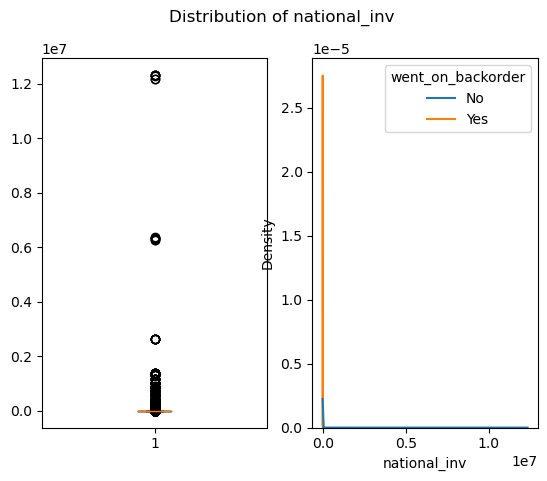

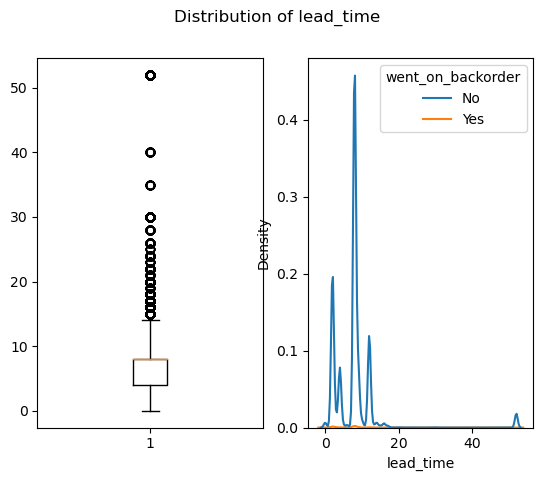

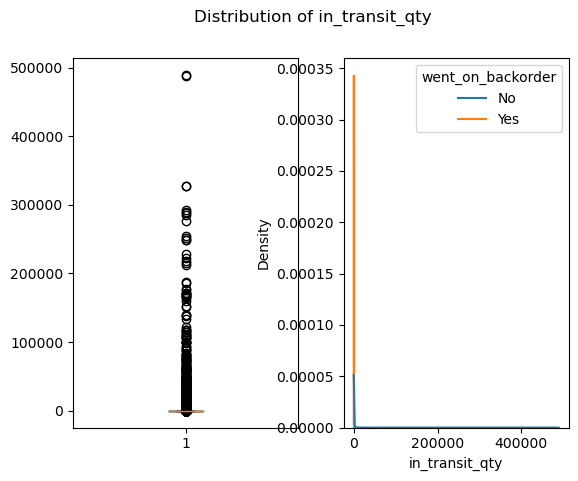

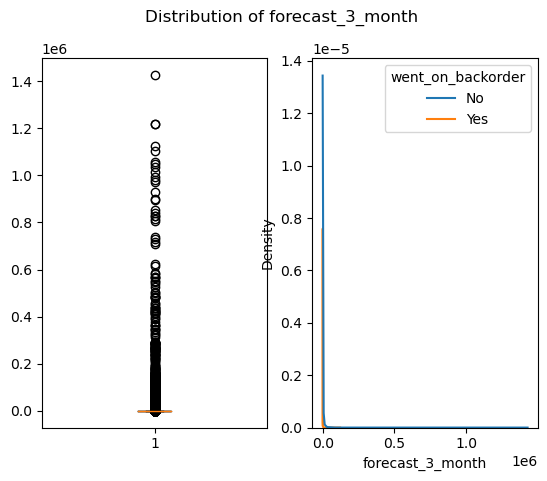

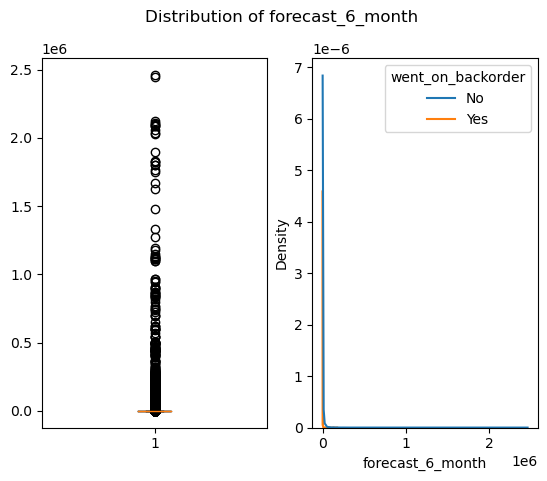

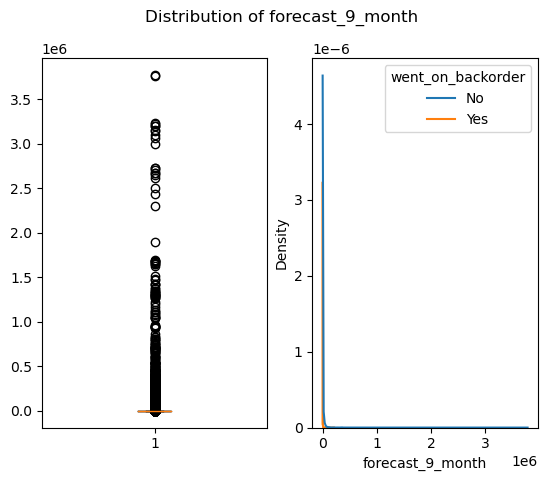

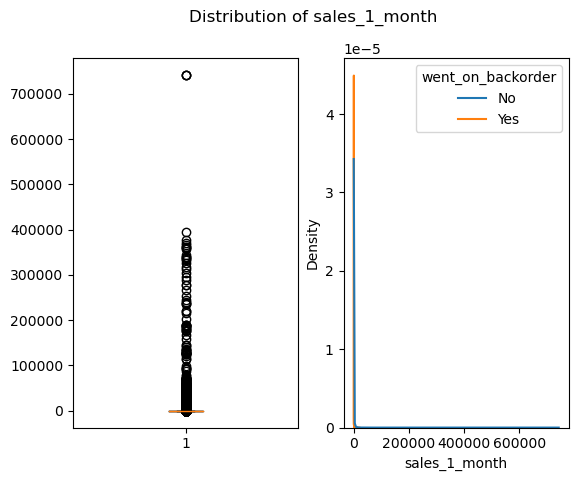

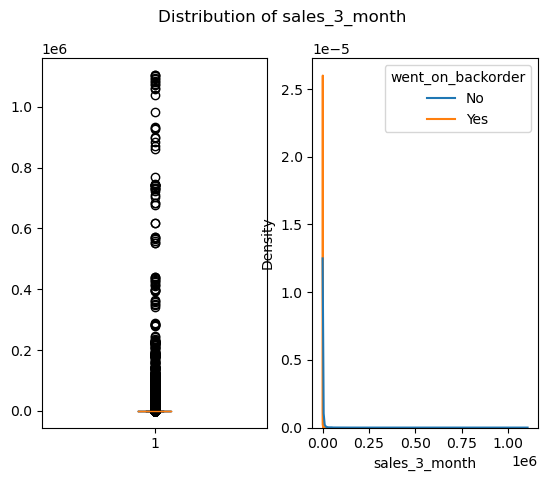

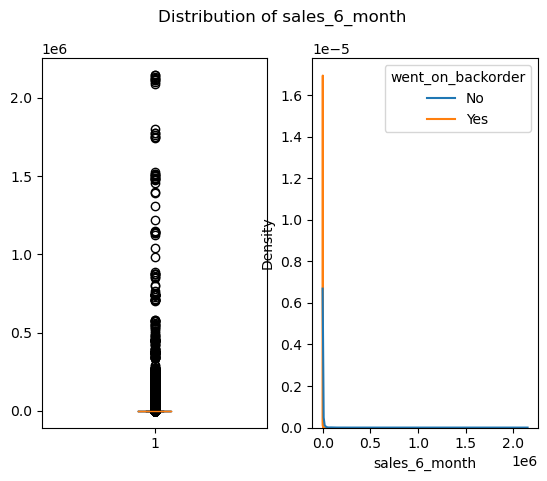

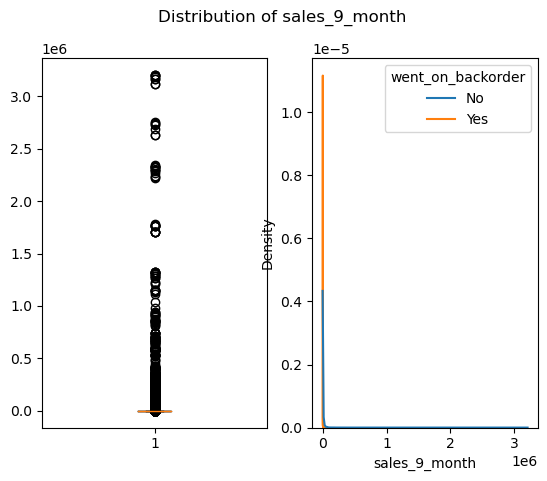

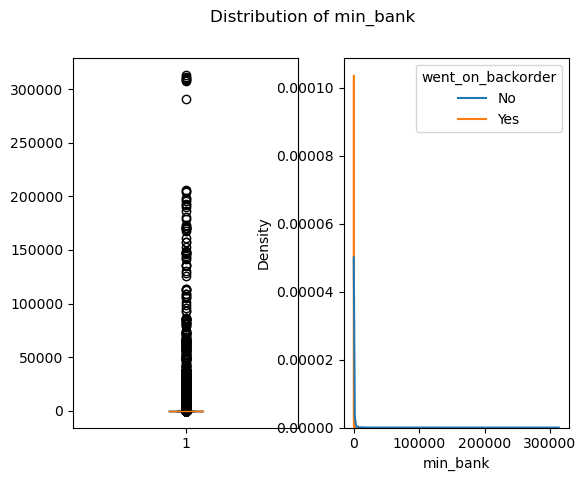

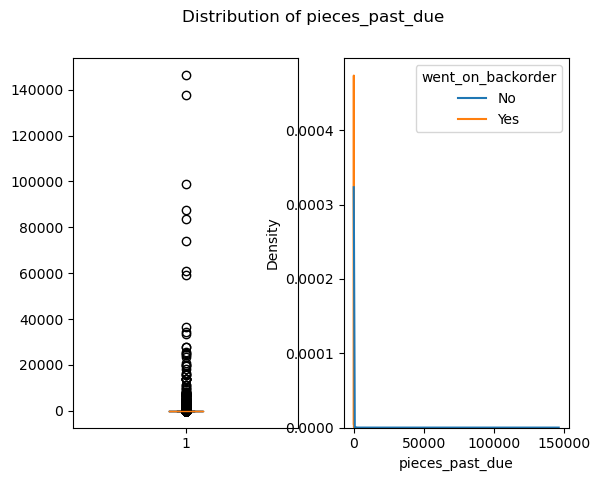

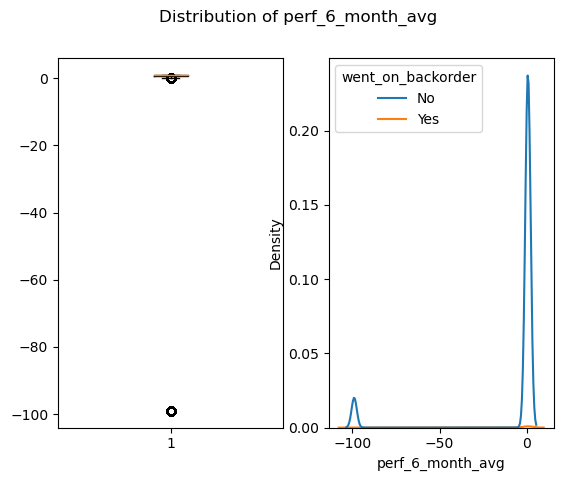

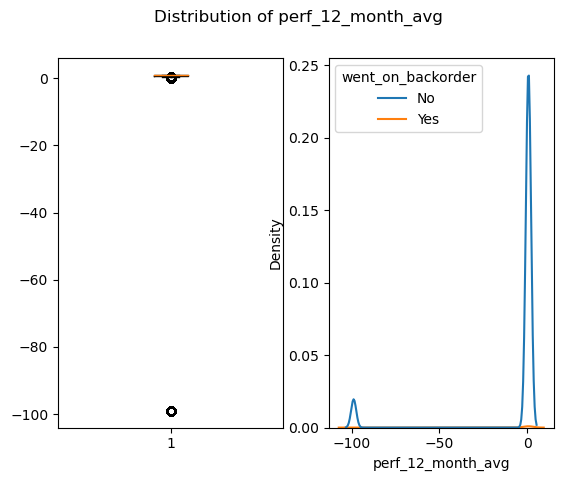

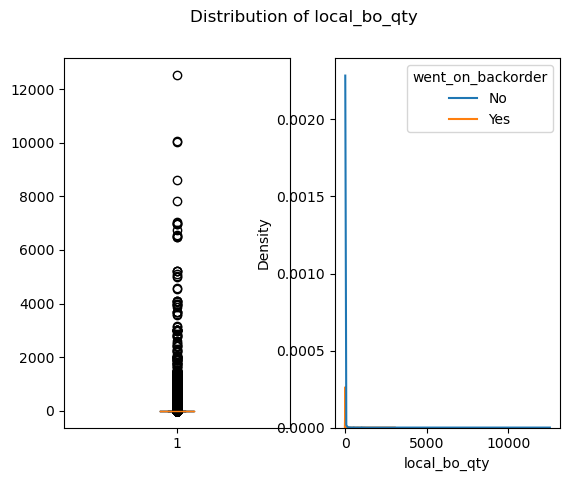

In [128]:
for col in num_features:
    univariate_Analysis(col,df)

### For Categorical Features

In [156]:
def UnivariateCat(df,col):
    class_counts = df[col].value_counts()
    plt.pie(class_counts,labels=class_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.suptitle(f"Number of yes/no in {col}")
    plt.show()

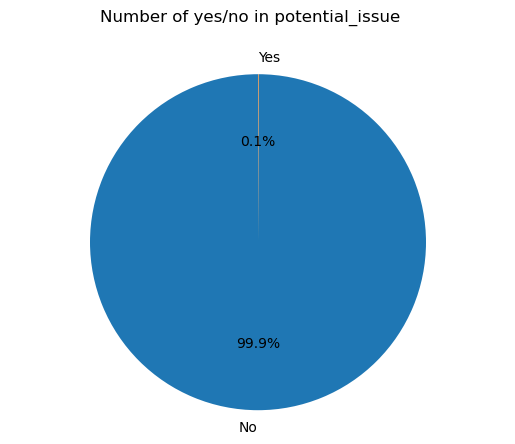

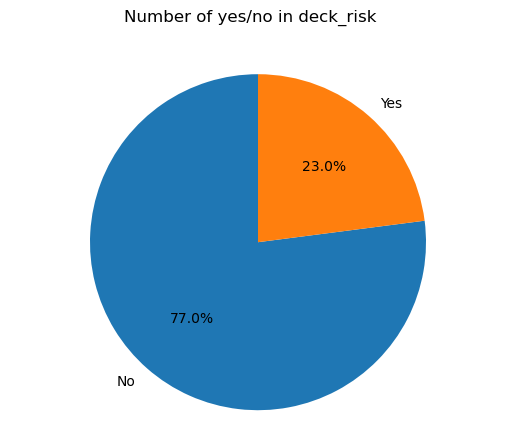

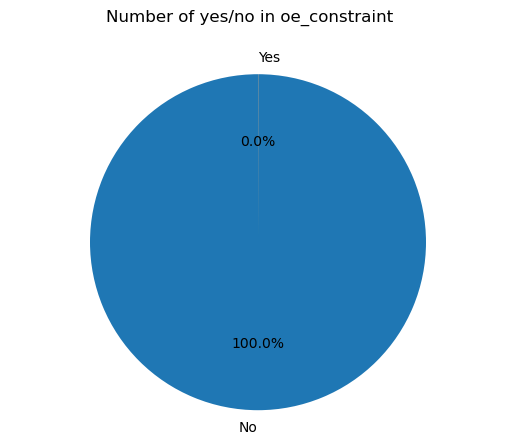

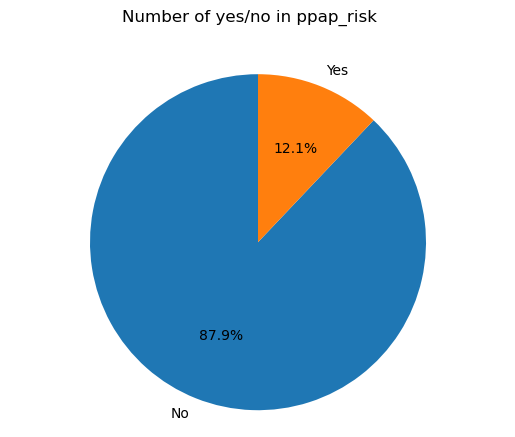

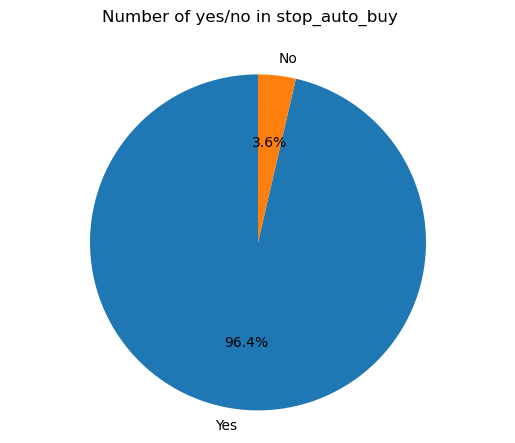

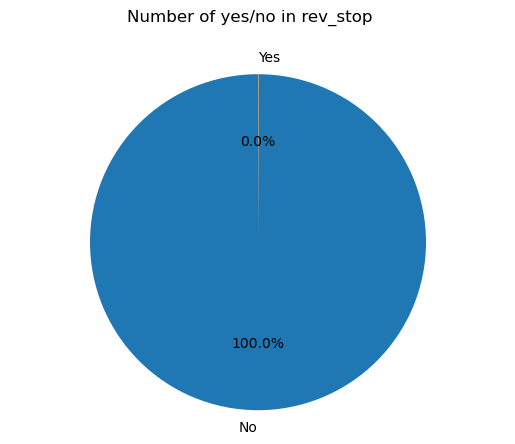

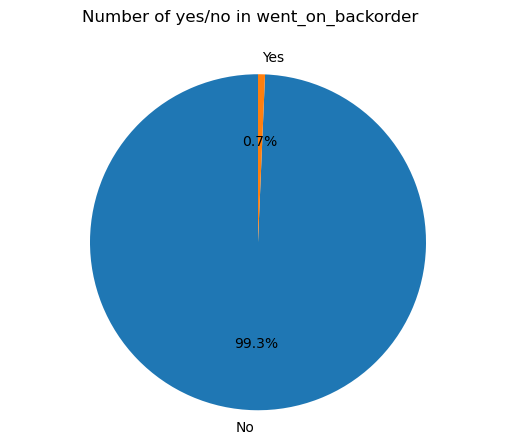

In [158]:
for col in cat_features:
    UnivariateCat(df,col)

# Let's Encode

Below function put 1 inplace of yes and 0 in place of no

In [160]:
cat_features

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [162]:
def replace_yes_no_with_binary(df, col):
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [163]:
for col in cat_features.delete(6):
    replace_yes_no_with_binary(df,col)

In [184]:
test_cat_featuers=['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop']

In [185]:
for col in test_cat_featuers:
    replace_yes_no_with_binary(test_df,col)

In [186]:
test_df.sample(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
90569,3370335,43.0,8.0,4.0,0.0,22.0,32.0,3.0,12.0,38.0,56.0,7.0,0,0.0,0.68,0.73,0.0,0,0,1,1,0,No
145810,3427511,17.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.82,0.0,0,0,0,1,0,No
59651,3338337,2.0,12.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,3.0,0.0,0,0.0,0.77,0.73,0.0,0,0,0,1,0,No
233340,3517933,11.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0,0.0,0.73,0.79,0.0,0,0,0,1,0,No
57726,3336355,12.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0,0.0,0.91,0.70,0.0,0,0,0,1,0,No


In [164]:
df.sample(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
989227,1549649,237.0,8.0,45.0,383.0,505.0,627.0,101.0,234.0,396.0,617.0,106.0,0,3.0,0.97,0.90,0.0,0,0,0,1,0,No
1130940,1495995,5.0,12.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.78,0.78,0.0,1,0,0,1,0,No
120124,1231640,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.49,0.45,0.0,1,0,0,1,0,No
401905,1749868,8.0,2.0,28.0,32.0,64.0,96.0,12.0,46.0,72.0,85.0,6.0,0,0.0,0.26,0.34,0.0,0,0,0,1,0,No
192715,1304270,167.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.91,0.90,0.0,0,0,0,1,0,No


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687860 entries, 0 to 1687859
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687860 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1687860 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  int64  
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

now our dataset is ready for prediction

# It's Time to Fight

In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load your dataset and split into features and target
X = df.drop(columns=['sku','went_on_backorder'])
y = df['went_on_backorder']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_samples_split': 200,
    'min_samples_leaf': 50,
    'subsample': 0.8,
    'max_features': 'sqrt',
    'max_leaf_nodes' : 5
}
# Initialize the Gradient Boosting classifier
clf = GradientBoostingClassifier(**params)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

'''

In [191]:
'''# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)'''

Accuracy: 0.9928933679333594
Confusion Matrix:
 [[335064    128]
 [  2271    109]]
Classification Report:
               precision    recall  f1-score   support

          No       0.99      1.00      1.00    335192
         Yes       0.46      0.05      0.08      2380

    accuracy                           0.99    337572
   macro avg       0.73      0.52      0.54    337572
weighted avg       0.99      0.99      0.99    337572



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, f1_score
# Load your dataset and split into features and target
X = df.drop(columns=['sku','went_on_backorder'])
y = df['went_on_backorder']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [50, 100, 200],
    'min_samples_leaf': [20, 50, 100],
    'subsample': [0.7, 0.8, 0.9],
    'max_features': ['sqrt', 'log2']
}

# Define the GradientBoostingClassifier model
model = GradientBoostingClassifier(random_state=42)

# Define a scoring function (use F1-score due to imbalanced data)
scorer = make_scorer(f1_score)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    verbose=2
)

# Fit the GridSearchCV on your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model from GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions and evaluate the model on your test data
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("F1-Score on Test Data:", f1)


In [192]:
'''y_test=test_df['went_on_backorder']
X_test=test_df.drop(columns=['sku','went_on_backorder'])
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)'''

Accuracy: 0.9889744913766395
Confusion Matrix:
 [[239315     72]
 [  2597     91]]
Classification Report:
               precision    recall  f1-score   support

          No       0.99      1.00      0.99    239387
         Yes       0.56      0.03      0.06      2688

    accuracy                           0.99    242075
   macro avg       0.77      0.52      0.53    242075
weighted avg       0.98      0.99      0.98    242075



In [ ]:
'''Boosting(number
of estimators = 10, max depth = 9 and min samples leaf = 5) with AUC score
of 0.9482 and Blagging(number of estimators = 10) with AUC score of
0.9478.'''